In [ ]:
import numpy as np
from numpy import ones
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from numpy import genfromtxt
from numpy import mean
from numpy.random import randn
from scipy.integrate import quad
import scipy.stats as stats
from scipy.stats import expon
from scipy.stats import norm
import pandas as pd
import sys
np.set_printoptions(precision=4)
np.set_printoptions(threshold=30)
np.set_printoptions(linewidth=300)
np.set_printoptions(suppress=True)
np.set_printoptions(threshold=sys.maxsize)

[[ 2.56 -3.52]
 [-3.52  4.84]]


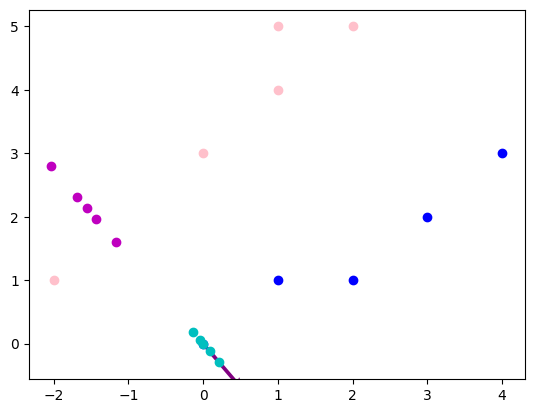

In [ ]:
X0 = np.array([[-2, 1],
               [0, 3],
               [1, 4],
               [1, 5],
               [2, 5]])
X1 = np.array([[0, 0],
               [1, 1],
               [2, 1],
               [3, 2],
               [4, 3]])

def centerOf(X):
  n = X.shape[0]
  return np.reshape(1/n * np.sum(X, axis=0), [2,1])

def S1(X0, X1):
  return (centerOf(X0) - centerOf(X1)).dot(((centerOf(X0) - centerOf(X1))).T)
S1 = S1(X0, X1)
V,D = np.linalg.eig(S1)
print(S1)
v = D[:,1].reshape(2,1)

v_hat = v/np.linalg.norm(v)
X0_proj = X0 @ v_hat @ v_hat.T
X1_proj = X1 @ v_hat @ v_hat.T

plt.plot(X0[:,0],X0[:,1],'o', color = 'pink')
plt.plot(X1[:,0],X1[:,1],'o', color = 'blue')

plt.plot(X0_proj[:,0],X0_proj[:,1],'o', color = 'm')
plt.plot(X1_proj[:,0],X1_proj[:,1],'o', color = 'c')

plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='purple')

plt.show()

[[ 3.098  -4.2598]
 [-3.3882  4.6588]]


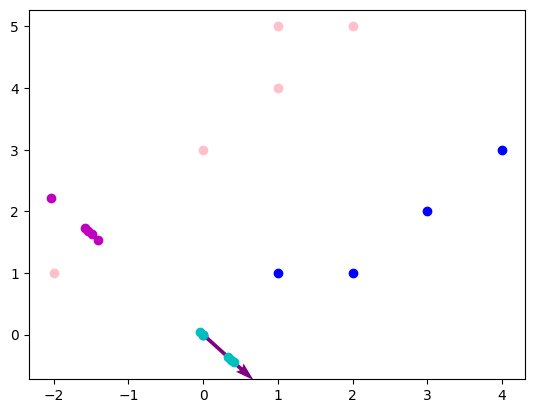

In [ ]:
C = np.eye(5) - (1/5)*np.ones((5,5))
s0 = X0.T @ C @ X0
s1 = X1.T @ C @ X1
S2 = s0 + s1

Q = np.linalg.inv(S2) @ S1
D, V = np.linalg.eig(Q)
v = V[:,1].reshape(2,1)
v_hat = v/np.linalg.norm(v)
X0_proj = X0 @ v_hat @ v_hat.T
X1_proj = X1 @ v_hat @ v_hat.T
print(Q)
plt.plot(X0[:,0],X0[:,1],'o', color = 'pink')
plt.plot(X1[:,0],X1[:,1],'o', color = 'blue')

plt.plot(X0_proj[:,0],X0_proj[:,1],'o', color = 'm')
plt.plot(X1_proj[:,0],X1_proj[:,1],'o', color = 'c')

plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='purple')

plt.show()